# IRIS - Connection I

![Concatenate Layer](https://github.com/DrKAI/image/blob/main/Concatenate%20Layer.png?raw=true)

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import load_iris

## 데이터 불러오기

- iris.feature_names를 이용하여 판다스 데이터 프레임 만들기!

In [2]:
iris = load_iris()

x = iris.data
y = iris.target

In [3]:
df_x = pd.DataFrame(x, columns=iris.feature_names)
df_x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## train set, test set 구분하기

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train_x, test_x, train_y, test_y = train_test_split(df_x, y, test_size=0.2, random_state=2021)

In [6]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((120, 4), (120,), (30, 4), (30,))

## **length끼리, width끼리**

In [7]:
print(df_x.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


In [8]:
tr_x_l = train_x.loc[:, ['sepal length (cm)', 'petal length (cm)'] ]
tr_x_w = train_x.loc[:, ['sepal width (cm)', 'petal width (cm)'] ]

In [9]:
tr_x_l.shape, tr_x_w.shape

((120, 2), (120, 2))

In [10]:
te_x_l = test_x.loc[:, ['sepal length (cm)', 'petal length (cm)'] ]
te_x_w = test_x.loc[:, ['sepal width (cm)', 'petal width (cm)'] ]

## One-hot Encoding

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
train_y = to_categorical(train_y, 3)
test_y = to_categorical(test_y, 3)


In [13]:
train_y.shape

(120, 3)

## Modeling : multi-input & Concatenate layer

In [14]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.activations import relu, softmax

from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [15]:
# 1. 세션 클리어
clear_session()

# 2. 레이어 사슬처럼 엮기 : input 2개!
il_l = Input( shape=(2,) )
hl_l = Dense(2, activation=relu)(il_l)

il_w = Input( shape=(2,) )
hl_w = Dense(2, activation=relu)(il_w)

cl = Concatenate()([hl_l, hl_w])
ol = Dense(3, activation=softmax)(cl)

# 3. 모델 시작과 끝 지정
model = Model([il_l, il_w], ol)

# 4. 모델 컴파일
model.compile(loss=categorical_crossentropy, metrics=['accuracy'],
              optimizer=Adam())

## 모델 시각화

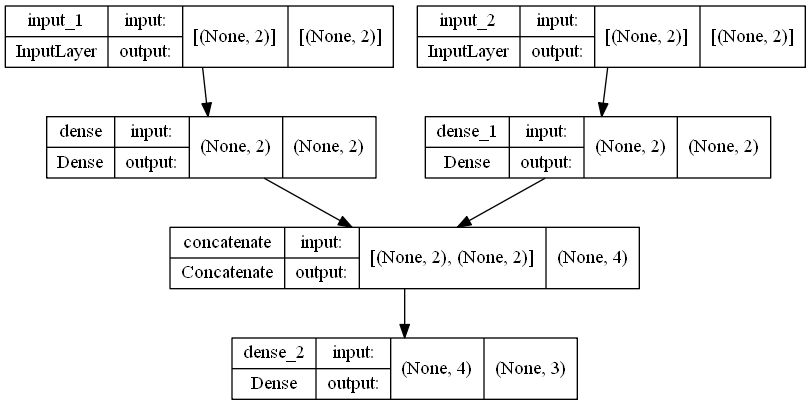

In [16]:
plot_model(model, show_shapes=True)

## 학습 시켜보기!

In [17]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=30,
                   verbose=1,
                   restore_best_weights=True)

In [18]:
model.fit([tr_x_l, tr_x_w], train_y, validation_split=0.15,
          epochs=1000, verbose=1, callbacks=[es])

Epoch 1/1000
4/4 [==============================] - 1s 111ms/step - loss: 3.0871 - accuracy: 0.3333 - val_loss: 3.1265 - val_accuracy: 0.3333
Epoch 2/1000
4/4 [==============================] - 0s 16ms/step - loss: 3.0316 - accuracy: 0.3333 - val_loss: 3.0695 - val_accuracy: 0.3333
Epoch 3/1000
4/4 [==============================] - 0s 15ms/step - loss: 2.9747 - accuracy: 0.3333 - val_loss: 3.0133 - val_accuracy: 0.3333
Epoch 4/1000
4/4 [==============================] - 0s 16ms/step - loss: 2.9193 - accuracy: 0.3333 - val_loss: 2.9577 - val_accuracy: 0.3333
Epoch 5/1000
4/4 [==============================] - 0s 16ms/step - loss: 2.8646 - accuracy: 0.3333 - val_loss: 2.9028 - val_accuracy: 0.3333
Epoch 6/1000
4/4 [==============================] - 0s 15ms/step - loss: 2.8119 - accuracy: 0.3333 - val_loss: 2.8480 - val_accuracy: 0.3333
Epoch 7/1000
4/4 [==============================] - 0s 18ms/step - loss: 2.7576 - accuracy: 0.3333 - val_loss: 2.7949 - val_accuracy: 0.3333
Epoch 8/1000

Epoch 59/1000
4/4 [==============================] - 0s 14ms/step - loss: 1.3086 - accuracy: 0.3333 - val_loss: 1.3299 - val_accuracy: 0.3333
Epoch 60/1000
4/4 [==============================] - 0s 15ms/step - loss: 1.2962 - accuracy: 0.3333 - val_loss: 1.3179 - val_accuracy: 0.3333
Epoch 61/1000
4/4 [==============================] - 0s 15ms/step - loss: 1.2852 - accuracy: 0.3333 - val_loss: 1.3066 - val_accuracy: 0.3333
Epoch 62/1000
4/4 [==============================] - 0s 14ms/step - loss: 1.2742 - accuracy: 0.3333 - val_loss: 1.2953 - val_accuracy: 0.3333
Epoch 63/1000
4/4 [==============================] - 0s 17ms/step - loss: 1.2634 - accuracy: 0.3333 - val_loss: 1.2838 - val_accuracy: 0.3333
Epoch 64/1000
4/4 [==============================] - 0s 16ms/step - loss: 1.2534 - accuracy: 0.3333 - val_loss: 1.2723 - val_accuracy: 0.3333
Epoch 65/1000
4/4 [==============================] - 0s 15ms/step - loss: 1.2420 - accuracy: 0.3333 - val_loss: 1.2618 - val_accuracy: 0.3333
Epoch 

4/4 [==============================] - 0s 14ms/step - loss: 1.0006 - accuracy: 0.2843 - val_loss: 1.0069 - val_accuracy: 0.3333
Epoch 117/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.9992 - accuracy: 0.2843 - val_loss: 1.0054 - val_accuracy: 0.3333
Epoch 118/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.9980 - accuracy: 0.2843 - val_loss: 1.0038 - val_accuracy: 0.3333
Epoch 119/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.9967 - accuracy: 0.2941 - val_loss: 1.0023 - val_accuracy: 0.3333
Epoch 120/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.9955 - accuracy: 0.2941 - val_loss: 1.0008 - val_accuracy: 0.3889
Epoch 121/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.9943 - accuracy: 0.2941 - val_loss: 0.9995 - val_accuracy: 0.3889
Epoch 122/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.9932 - accuracy: 0.3137 - val_loss: 0.9983 - val_accuracy: 0.3889
Epoch 123/1000

4/4 [==============================] - 0s 15ms/step - loss: 0.9479 - accuracy: 0.3725 - val_loss: 0.9511 - val_accuracy: 0.3889
Epoch 174/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.9471 - accuracy: 0.3922 - val_loss: 0.9500 - val_accuracy: 0.4444
Epoch 175/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.9461 - accuracy: 0.4118 - val_loss: 0.9491 - val_accuracy: 0.4444
Epoch 176/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.9452 - accuracy: 0.4216 - val_loss: 0.9481 - val_accuracy: 0.4444
Epoch 177/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.9443 - accuracy: 0.4216 - val_loss: 0.9473 - val_accuracy: 0.4444
Epoch 178/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.9434 - accuracy: 0.4608 - val_loss: 0.9464 - val_accuracy: 0.4444
Epoch 179/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.9423 - accuracy: 0.4902 - val_loss: 0.9455 - val_accuracy: 0.5556
Epoch 180/1000

4/4 [==============================] - 0s 15ms/step - loss: 0.8962 - accuracy: 0.6569 - val_loss: 0.8993 - val_accuracy: 0.6667
Epoch 231/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.8954 - accuracy: 0.6569 - val_loss: 0.8982 - val_accuracy: 0.6667
Epoch 232/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.8945 - accuracy: 0.6569 - val_loss: 0.8972 - val_accuracy: 0.6667
Epoch 233/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.8936 - accuracy: 0.6569 - val_loss: 0.8962 - val_accuracy: 0.6667
Epoch 234/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.8927 - accuracy: 0.6569 - val_loss: 0.8951 - val_accuracy: 0.6667
Epoch 235/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.8918 - accuracy: 0.6667 - val_loss: 0.8941 - val_accuracy: 0.6667
Epoch 236/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.8910 - accuracy: 0.6667 - val_loss: 0.8932 - val_accuracy: 0.6667
Epoch 237/1000

4/4 [==============================] - 0s 15ms/step - loss: 0.8443 - accuracy: 0.6667 - val_loss: 0.8467 - val_accuracy: 0.6667
Epoch 288/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.8434 - accuracy: 0.6667 - val_loss: 0.8459 - val_accuracy: 0.6667
Epoch 289/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.8425 - accuracy: 0.6667 - val_loss: 0.8450 - val_accuracy: 0.6667
Epoch 290/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.8416 - accuracy: 0.6667 - val_loss: 0.8439 - val_accuracy: 0.6667
Epoch 291/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.8407 - accuracy: 0.6667 - val_loss: 0.8428 - val_accuracy: 0.6667
Epoch 292/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.8398 - accuracy: 0.6667 - val_loss: 0.8418 - val_accuracy: 0.6667
Epoch 293/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.8389 - accuracy: 0.6667 - val_loss: 0.8409 - val_accuracy: 0.6667
Epoch 294/1000

4/4 [==============================] - 0s 15ms/step - loss: 0.7915 - accuracy: 0.6667 - val_loss: 0.7918 - val_accuracy: 0.6667
Epoch 345/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.7905 - accuracy: 0.6667 - val_loss: 0.7910 - val_accuracy: 0.6667
Epoch 346/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.7895 - accuracy: 0.6667 - val_loss: 0.7904 - val_accuracy: 0.6667
Epoch 347/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.7887 - accuracy: 0.6667 - val_loss: 0.7898 - val_accuracy: 0.6667
Epoch 348/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.7879 - accuracy: 0.6667 - val_loss: 0.7891 - val_accuracy: 0.6667
Epoch 349/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.7869 - accuracy: 0.6667 - val_loss: 0.7882 - val_accuracy: 0.6667
Epoch 350/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.7860 - accuracy: 0.6667 - val_loss: 0.7875 - val_accuracy: 0.6667
Epoch 351/1000

4/4 [==============================] - 0s 15ms/step - loss: 0.7385 - accuracy: 0.7255 - val_loss: 0.7392 - val_accuracy: 0.6667
Epoch 402/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.7377 - accuracy: 0.7255 - val_loss: 0.7383 - val_accuracy: 0.6667
Epoch 403/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.7368 - accuracy: 0.7255 - val_loss: 0.7375 - val_accuracy: 0.6667
Epoch 404/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.7359 - accuracy: 0.7353 - val_loss: 0.7366 - val_accuracy: 0.6667
Epoch 405/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.7350 - accuracy: 0.7353 - val_loss: 0.7357 - val_accuracy: 0.6667
Epoch 406/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.7341 - accuracy: 0.7353 - val_loss: 0.7348 - val_accuracy: 0.6667
Epoch 407/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.7332 - accuracy: 0.7353 - val_loss: 0.7342 - val_accuracy: 0.6667
Epoch 408/1000

4/4 [==============================] - 0s 15ms/step - loss: 0.6881 - accuracy: 0.7745 - val_loss: 0.6897 - val_accuracy: 0.7778
Epoch 459/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.6873 - accuracy: 0.7745 - val_loss: 0.6888 - val_accuracy: 0.7778
Epoch 460/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.6864 - accuracy: 0.7745 - val_loss: 0.6881 - val_accuracy: 0.7778
Epoch 461/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.6854 - accuracy: 0.7745 - val_loss: 0.6878 - val_accuracy: 0.7778
Epoch 462/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.6847 - accuracy: 0.7745 - val_loss: 0.6877 - val_accuracy: 0.7778
Epoch 463/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.6838 - accuracy: 0.7647 - val_loss: 0.6873 - val_accuracy: 0.7778
Epoch 464/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.6830 - accuracy: 0.7647 - val_loss: 0.6871 - val_accuracy: 0.7778
Epoch 465/1000

4/4 [==============================] - 0s 17ms/step - loss: 0.6421 - accuracy: 0.7941 - val_loss: 0.6463 - val_accuracy: 0.8333
Epoch 516/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.6413 - accuracy: 0.7941 - val_loss: 0.6456 - val_accuracy: 0.8333
Epoch 517/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.6406 - accuracy: 0.7941 - val_loss: 0.6447 - val_accuracy: 0.8333
Epoch 518/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.6398 - accuracy: 0.7843 - val_loss: 0.6441 - val_accuracy: 0.8333
Epoch 519/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.6391 - accuracy: 0.7941 - val_loss: 0.6436 - val_accuracy: 0.8333
Epoch 520/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.6384 - accuracy: 0.7941 - val_loss: 0.6431 - val_accuracy: 0.8333
Epoch 521/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.6376 - accuracy: 0.8039 - val_loss: 0.6425 - val_accuracy: 0.8333
Epoch 522/1000

4/4 [==============================] - 0s 16ms/step - loss: 0.6011 - accuracy: 0.8333 - val_loss: 0.6065 - val_accuracy: 0.8333
Epoch 573/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.6004 - accuracy: 0.8333 - val_loss: 0.6063 - val_accuracy: 0.8333
Epoch 574/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.5997 - accuracy: 0.8333 - val_loss: 0.6055 - val_accuracy: 0.8333
Epoch 575/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.5990 - accuracy: 0.8333 - val_loss: 0.6047 - val_accuracy: 0.8333
Epoch 576/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.5983 - accuracy: 0.8333 - val_loss: 0.6042 - val_accuracy: 0.8333
Epoch 577/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.5977 - accuracy: 0.8333 - val_loss: 0.6038 - val_accuracy: 0.8333
Epoch 578/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.5971 - accuracy: 0.8333 - val_loss: 0.6034 - val_accuracy: 0.8333
Epoch 579/1000

4/4 [==============================] - 0s 15ms/step - loss: 0.5647 - accuracy: 0.8431 - val_loss: 0.5753 - val_accuracy: 0.8333
Epoch 630/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.5642 - accuracy: 0.8431 - val_loss: 0.5750 - val_accuracy: 0.8333
Epoch 631/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.5637 - accuracy: 0.8431 - val_loss: 0.5745 - val_accuracy: 0.8333
Epoch 632/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.5631 - accuracy: 0.8431 - val_loss: 0.5733 - val_accuracy: 0.8333
Epoch 633/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.5624 - accuracy: 0.8333 - val_loss: 0.5720 - val_accuracy: 0.8333
Epoch 634/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.5616 - accuracy: 0.8431 - val_loss: 0.5712 - val_accuracy: 0.8333
Epoch 635/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.5610 - accuracy: 0.8431 - val_loss: 0.5701 - val_accuracy: 0.8333
Epoch 636/1000

4/4 [==============================] - 0s 16ms/step - loss: 0.5314 - accuracy: 0.8824 - val_loss: 0.5403 - val_accuracy: 0.8333
Epoch 687/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.5309 - accuracy: 0.8824 - val_loss: 0.5407 - val_accuracy: 0.8333
Epoch 688/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.5303 - accuracy: 0.8725 - val_loss: 0.5407 - val_accuracy: 0.8333
Epoch 689/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.5299 - accuracy: 0.8725 - val_loss: 0.5409 - val_accuracy: 0.8333
Epoch 690/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.5294 - accuracy: 0.8824 - val_loss: 0.5407 - val_accuracy: 0.8333
Epoch 691/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.5290 - accuracy: 0.8824 - val_loss: 0.5401 - val_accuracy: 0.8333
Epoch 692/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.5284 - accuracy: 0.8824 - val_loss: 0.5395 - val_accuracy: 0.8333
Epoch 693/1000

4/4 [==============================] - 0s 17ms/step - loss: 0.5018 - accuracy: 0.9314 - val_loss: 0.5116 - val_accuracy: 0.8333
Epoch 744/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.5013 - accuracy: 0.9314 - val_loss: 0.5112 - val_accuracy: 0.8333
Epoch 745/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.5008 - accuracy: 0.9314 - val_loss: 0.5108 - val_accuracy: 0.8333
Epoch 746/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.5004 - accuracy: 0.9216 - val_loss: 0.5104 - val_accuracy: 0.8333
Epoch 747/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.4999 - accuracy: 0.9314 - val_loss: 0.5098 - val_accuracy: 0.8333
Epoch 748/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.4994 - accuracy: 0.9216 - val_loss: 0.5099 - val_accuracy: 0.8333
Epoch 749/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.4990 - accuracy: 0.9118 - val_loss: 0.5102 - val_accuracy: 0.8333
Epoch 750/1000

4/4 [==============================] - 0s 16ms/step - loss: 0.4747 - accuracy: 0.9510 - val_loss: 0.4825 - val_accuracy: 0.9444
Epoch 801/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.4742 - accuracy: 0.9510 - val_loss: 0.4821 - val_accuracy: 0.9444
Epoch 802/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.4738 - accuracy: 0.9510 - val_loss: 0.4818 - val_accuracy: 0.9444
Epoch 803/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.4733 - accuracy: 0.9510 - val_loss: 0.4820 - val_accuracy: 0.9444
Epoch 804/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.4727 - accuracy: 0.9510 - val_loss: 0.4822 - val_accuracy: 0.9444
Epoch 805/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.4721 - accuracy: 0.9510 - val_loss: 0.4823 - val_accuracy: 0.9444
Epoch 806/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.4718 - accuracy: 0.9510 - val_loss: 0.4828 - val_accuracy: 0.9444
Epoch 807/1000

4/4 [==============================] - 0s 18ms/step - loss: 0.4496 - accuracy: 0.9510 - val_loss: 0.4650 - val_accuracy: 0.9444
Epoch 858/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.4493 - accuracy: 0.9510 - val_loss: 0.4648 - val_accuracy: 0.9444
Epoch 859/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.4490 - accuracy: 0.9510 - val_loss: 0.4638 - val_accuracy: 0.9444
Epoch 860/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.4483 - accuracy: 0.9510 - val_loss: 0.4619 - val_accuracy: 0.9444
Epoch 861/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.4477 - accuracy: 0.9510 - val_loss: 0.4603 - val_accuracy: 0.9444
Epoch 862/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.4473 - accuracy: 0.9510 - val_loss: 0.4594 - val_accuracy: 0.9444
Epoch 863/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.4469 - accuracy: 0.9510 - val_loss: 0.4592 - val_accuracy: 0.9444
Epoch 864/1000

4/4 [==============================] - 0s 14ms/step - loss: 0.4266 - accuracy: 0.9510 - val_loss: 0.4431 - val_accuracy: 0.9444
Epoch 915/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.4264 - accuracy: 0.9510 - val_loss: 0.4437 - val_accuracy: 0.9444
Epoch 916/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.4261 - accuracy: 0.9510 - val_loss: 0.4430 - val_accuracy: 0.9444
Epoch 917/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.4255 - accuracy: 0.9510 - val_loss: 0.4413 - val_accuracy: 0.9444
Epoch 918/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.4248 - accuracy: 0.9510 - val_loss: 0.4391 - val_accuracy: 0.9444
Epoch 919/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.4243 - accuracy: 0.9510 - val_loss: 0.4374 - val_accuracy: 0.9444
Epoch 920/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.4238 - accuracy: 0.9510 - val_loss: 0.4361 - val_accuracy: 0.9444
Epoch 921/1000

4/4 [==============================] - 0s 19ms/step - loss: 0.4043 - accuracy: 0.9510 - val_loss: 0.4149 - val_accuracy: 0.9444
Epoch 972/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.4039 - accuracy: 0.9510 - val_loss: 0.4150 - val_accuracy: 0.9444
Epoch 973/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.4035 - accuracy: 0.9510 - val_loss: 0.4157 - val_accuracy: 0.9444
Epoch 974/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.4031 - accuracy: 0.9510 - val_loss: 0.4164 - val_accuracy: 0.9444
Epoch 975/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.4026 - accuracy: 0.9510 - val_loss: 0.4165 - val_accuracy: 0.9444
Epoch 976/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.4021 - accuracy: 0.9510 - val_loss: 0.4172 - val_accuracy: 0.9444
Epoch 977/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.4022 - accuracy: 0.9510 - val_loss: 0.4185 - val_accuracy: 0.9444
Epoch 978/1000

---
---
---
---
---

# IRIS - Connection I practice

- 위의 코드를 **그대로** 따라서 코드 작성하기!

## 데이터 불러오기

- iris.feature_names를 이용하여 판다스 데이터 프레임 만들기!

In [19]:
iris = load_iris()

x = iris.data
y = iris.target

In [20]:
df_x = pd.DataFrame(x, columns=iris.feature_names)
df_x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## train set, test set 구분하기

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_x, y, test_size=0.2, random_state=2022)

## **length끼리, width끼리**

In [22]:
x_tr_le = x_train[['sepal length (cm)', 'petal length (cm)']]
x_tr_wi = x_train[['sepal width (cm)', 'petal width (cm)']]

x_te_le = x_test[['sepal length (cm)', 'petal length (cm)']]
x_te_wi = x_test[['sepal length (cm)', 'petal length (cm)']]

## One-hot Encoding

In [23]:
from tensorflow.keras.utils import to_categorical

y_len = len(np.unique(y_train))

y_train = to_categorical(y_train, y_len)
y_test = to_categorical(y_test, y_len)

(x_tr_le.shape, x_tr_wi.shape, y_train.shape), (x_te_le.shape, x_te_wi.shape, y_test.shape)

(((120, 2), (120, 2), (120, 3)), ((30, 2), (30, 2), (30, 3)))

## Modeling : multi-input & Concatenate layer

In [27]:
# 초기화
keras.backend.clear_session()

# 레이어 생성
le_input_layer = keras.layers.Input(shape=(2,), name='le_input')
le_hiden_layer = keras.layers.Dense(2, activation='relu', name='le_hiden')(le_input_layer)

wi_input_layer = keras.layers.Input(shape=(2,), name='wi_input')
wi_hiden_layer = keras.layers.Dense(2, activation='relu', name='wi_hiden')(wi_input_layer)

concat_layer = keras.layers.Concatenate(name='concat')([le_hiden_layer, wi_hiden_layer])
output_layer = keras.layers.Dense(3, activation='softmax', name='output')(concat_layer)

# 모델 생성
model = keras.models.Model([le_input_layer, wi_input_layer], output_layer)

# 컴파일
model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'], optimizer=keras.optimizers.Adam())

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 le_input (InputLayer)          [(None, 2)]          0           []                               
                                                                                                  
 wi_input (InputLayer)          [(None, 2)]          0           []                               
                                                                                                  
 le_hiden (Dense)               (None, 2)            6           ['le_input[0][0]']               
                                                                                                  
 wi_hiden (Dense)               (None, 2)            6           ['wi_input[0][0]']               
                                                                                              

## 모델 시각화

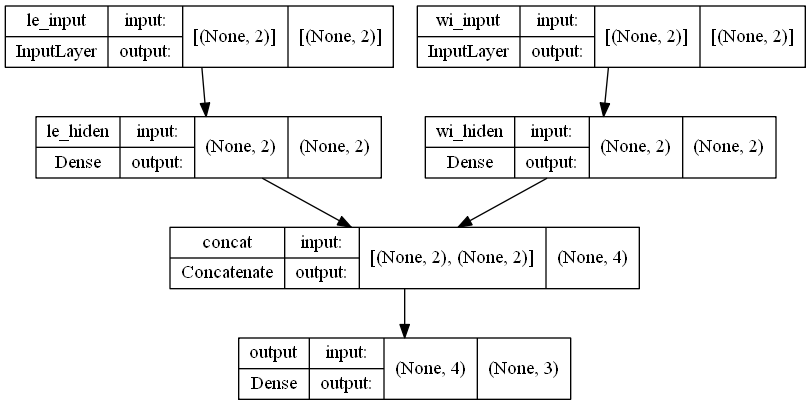

In [28]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

## 학습 시켜보기!

In [29]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=30, verbose=1, restore_best_weights=True)

model.fit([x_tr_le, x_tr_wi], y_train, epochs=1000, verbose=1, validation_split=0.15, callbacks=[es])

Epoch 1/1000
4/4 [==============================] - 1s 79ms/step - loss: 1.6870 - accuracy: 0.1863 - val_loss: 1.7027 - val_accuracy: 0.1667
Epoch 2/1000
4/4 [==============================] - 0s 16ms/step - loss: 1.6702 - accuracy: 0.1863 - val_loss: 1.6792 - val_accuracy: 0.1667
Epoch 3/1000
4/4 [==============================] - 0s 13ms/step - loss: 1.6535 - accuracy: 0.1863 - val_loss: 1.6544 - val_accuracy: 0.1667
Epoch 4/1000
4/4 [==============================] - 0s 14ms/step - loss: 1.6371 - accuracy: 0.2059 - val_loss: 1.6310 - val_accuracy: 0.2222
Epoch 5/1000
4/4 [==============================] - 0s 15ms/step - loss: 1.6220 - accuracy: 0.1961 - val_loss: 1.6133 - val_accuracy: 0.2222
Epoch 6/1000
4/4 [==============================] - 0s 16ms/step - loss: 1.6087 - accuracy: 0.2059 - val_loss: 1.5932 - val_accuracy: 0.2222
Epoch 7/1000
4/4 [==============================] - 0s 14ms/step - loss: 1.5950 - accuracy: 0.2157 - val_loss: 1.5746 - val_accuracy: 0.2222
Epoch 8/1000


Epoch 59/1000
4/4 [==============================] - 0s 15ms/step - loss: 1.2032 - accuracy: 0.2255 - val_loss: 1.1250 - val_accuracy: 0.2222
Epoch 60/1000
4/4 [==============================] - 0s 15ms/step - loss: 1.1991 - accuracy: 0.2255 - val_loss: 1.1222 - val_accuracy: 0.2222
Epoch 61/1000
4/4 [==============================] - 0s 14ms/step - loss: 1.1960 - accuracy: 0.2353 - val_loss: 1.1197 - val_accuracy: 0.2222
Epoch 62/1000
4/4 [==============================] - 0s 14ms/step - loss: 1.1915 - accuracy: 0.2549 - val_loss: 1.1151 - val_accuracy: 0.2778
Epoch 63/1000
4/4 [==============================] - 0s 14ms/step - loss: 1.1866 - accuracy: 0.2647 - val_loss: 1.1102 - val_accuracy: 0.2778
Epoch 64/1000
4/4 [==============================] - 0s 14ms/step - loss: 1.1825 - accuracy: 0.2745 - val_loss: 1.1042 - val_accuracy: 0.3889
Epoch 65/1000
4/4 [==============================] - 0s 14ms/step - loss: 1.1785 - accuracy: 0.2745 - val_loss: 1.0981 - val_accuracy: 0.3889
Epoch 

4/4 [==============================] - 0s 13ms/step - loss: 1.0335 - accuracy: 0.4804 - val_loss: 0.9706 - val_accuracy: 0.5000
Epoch 117/1000
4/4 [==============================] - 0s 13ms/step - loss: 1.0312 - accuracy: 0.4804 - val_loss: 0.9690 - val_accuracy: 0.5000
Epoch 118/1000
4/4 [==============================] - 0s 14ms/step - loss: 1.0290 - accuracy: 0.4804 - val_loss: 0.9674 - val_accuracy: 0.5000
Epoch 119/1000
4/4 [==============================] - 0s 13ms/step - loss: 1.0269 - accuracy: 0.4804 - val_loss: 0.9658 - val_accuracy: 0.5000
Epoch 120/1000
4/4 [==============================] - 0s 14ms/step - loss: 1.0250 - accuracy: 0.4804 - val_loss: 0.9640 - val_accuracy: 0.5000
Epoch 121/1000
4/4 [==============================] - 0s 14ms/step - loss: 1.0227 - accuracy: 0.4804 - val_loss: 0.9624 - val_accuracy: 0.5556
Epoch 122/1000
4/4 [==============================] - 0s 15ms/step - loss: 1.0206 - accuracy: 0.4902 - val_loss: 0.9602 - val_accuracy: 0.5556
Epoch 123/1000

4/4 [==============================] - 0s 15ms/step - loss: 0.9264 - accuracy: 0.5882 - val_loss: 0.8849 - val_accuracy: 0.5556
Epoch 174/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.9244 - accuracy: 0.5882 - val_loss: 0.8825 - val_accuracy: 0.5556
Epoch 175/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.9230 - accuracy: 0.5784 - val_loss: 0.8797 - val_accuracy: 0.5556
Epoch 176/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.9213 - accuracy: 0.5686 - val_loss: 0.8774 - val_accuracy: 0.5556
Epoch 177/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.9196 - accuracy: 0.5686 - val_loss: 0.8758 - val_accuracy: 0.5556
Epoch 178/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.9175 - accuracy: 0.5784 - val_loss: 0.8744 - val_accuracy: 0.5556
Epoch 179/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.9159 - accuracy: 0.5882 - val_loss: 0.8721 - val_accuracy: 0.6111
Epoch 180/1000

4/4 [==============================] - 0s 14ms/step - loss: 0.8263 - accuracy: 0.6667 - val_loss: 0.7939 - val_accuracy: 0.6667
Epoch 231/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.8247 - accuracy: 0.6667 - val_loss: 0.7914 - val_accuracy: 0.6667
Epoch 232/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.8226 - accuracy: 0.6667 - val_loss: 0.7889 - val_accuracy: 0.6667
Epoch 233/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.8207 - accuracy: 0.6667 - val_loss: 0.7873 - val_accuracy: 0.6667
Epoch 234/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.8190 - accuracy: 0.6765 - val_loss: 0.7856 - val_accuracy: 0.6667
Epoch 235/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.8173 - accuracy: 0.6863 - val_loss: 0.7847 - val_accuracy: 0.6667
Epoch 236/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.8153 - accuracy: 0.6961 - val_loss: 0.7831 - val_accuracy: 0.6667
Epoch 237/1000

4/4 [==============================] - 0s 15ms/step - loss: 0.7238 - accuracy: 0.7549 - val_loss: 0.6916 - val_accuracy: 0.8333
Epoch 288/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.7217 - accuracy: 0.7549 - val_loss: 0.6898 - val_accuracy: 0.7778
Epoch 289/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.7200 - accuracy: 0.7549 - val_loss: 0.6883 - val_accuracy: 0.7778
Epoch 290/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.7182 - accuracy: 0.7549 - val_loss: 0.6867 - val_accuracy: 0.7778
Epoch 291/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.7165 - accuracy: 0.7549 - val_loss: 0.6849 - val_accuracy: 0.7778
Epoch 292/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.7150 - accuracy: 0.7451 - val_loss: 0.6830 - val_accuracy: 0.7778
Epoch 293/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.7132 - accuracy: 0.7451 - val_loss: 0.6813 - val_accuracy: 0.7778
Epoch 294/1000

4/4 [==============================] - 0s 15ms/step - loss: 0.6276 - accuracy: 0.8725 - val_loss: 0.6001 - val_accuracy: 0.8889
Epoch 345/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.6258 - accuracy: 0.8725 - val_loss: 0.5993 - val_accuracy: 0.8889
Epoch 346/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.6245 - accuracy: 0.8627 - val_loss: 0.5987 - val_accuracy: 0.8889
Epoch 347/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.6229 - accuracy: 0.8529 - val_loss: 0.5983 - val_accuracy: 0.8889
Epoch 348/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.6218 - accuracy: 0.8529 - val_loss: 0.5979 - val_accuracy: 0.8889
Epoch 349/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.6203 - accuracy: 0.8529 - val_loss: 0.5966 - val_accuracy: 0.8889
Epoch 350/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.6189 - accuracy: 0.8529 - val_loss: 0.5950 - val_accuracy: 0.8889
Epoch 351/1000

4/4 [==============================] - 0s 15ms/step - loss: 0.5514 - accuracy: 0.9020 - val_loss: 0.5306 - val_accuracy: 0.8889
Epoch 402/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.5502 - accuracy: 0.9020 - val_loss: 0.5287 - val_accuracy: 0.8889
Epoch 403/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.5489 - accuracy: 0.9020 - val_loss: 0.5268 - val_accuracy: 0.8889
Epoch 404/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.5475 - accuracy: 0.9118 - val_loss: 0.5250 - val_accuracy: 0.8889
Epoch 405/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.5462 - accuracy: 0.9216 - val_loss: 0.5232 - val_accuracy: 0.8889
Epoch 406/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.5450 - accuracy: 0.9216 - val_loss: 0.5211 - val_accuracy: 0.8889
Epoch 407/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.5438 - accuracy: 0.9314 - val_loss: 0.5193 - val_accuracy: 0.8889
Epoch 408/1000

4/4 [==============================] - 0s 16ms/step - loss: 0.4877 - accuracy: 0.9412 - val_loss: 0.4716 - val_accuracy: 0.8889
Epoch 459/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.4866 - accuracy: 0.9412 - val_loss: 0.4707 - val_accuracy: 0.8889
Epoch 460/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.4856 - accuracy: 0.9412 - val_loss: 0.4698 - val_accuracy: 0.8889
Epoch 461/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.4844 - accuracy: 0.9412 - val_loss: 0.4685 - val_accuracy: 0.8889
Epoch 462/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.4832 - accuracy: 0.9510 - val_loss: 0.4670 - val_accuracy: 0.8889
Epoch 463/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.4823 - accuracy: 0.9510 - val_loss: 0.4655 - val_accuracy: 0.8889
Epoch 464/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.4812 - accuracy: 0.9510 - val_loss: 0.4641 - val_accuracy: 0.8889
Epoch 465/1000

4/4 [==============================] - 0s 15ms/step - loss: 0.4310 - accuracy: 0.9510 - val_loss: 0.4202 - val_accuracy: 0.8889
Epoch 516/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.4300 - accuracy: 0.9510 - val_loss: 0.4191 - val_accuracy: 0.8889
Epoch 517/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.4291 - accuracy: 0.9510 - val_loss: 0.4182 - val_accuracy: 0.8889
Epoch 518/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.4280 - accuracy: 0.9608 - val_loss: 0.4173 - val_accuracy: 0.8889
Epoch 519/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.4272 - accuracy: 0.9510 - val_loss: 0.4164 - val_accuracy: 0.8889
Epoch 520/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.4264 - accuracy: 0.9510 - val_loss: 0.4158 - val_accuracy: 0.8889
Epoch 521/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.4252 - accuracy: 0.9510 - val_loss: 0.4155 - val_accuracy: 0.8889
Epoch 522/1000

4/4 [==============================] - 0s 16ms/step - loss: 0.3805 - accuracy: 0.9510 - val_loss: 0.3761 - val_accuracy: 0.8889
Epoch 573/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.3797 - accuracy: 0.9510 - val_loss: 0.3752 - val_accuracy: 0.8889
Epoch 574/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.3790 - accuracy: 0.9608 - val_loss: 0.3743 - val_accuracy: 0.8889
Epoch 575/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.3787 - accuracy: 0.9510 - val_loss: 0.3735 - val_accuracy: 0.8889
Epoch 576/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.3779 - accuracy: 0.9510 - val_loss: 0.3726 - val_accuracy: 0.8889
Epoch 577/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.3770 - accuracy: 0.9510 - val_loss: 0.3719 - val_accuracy: 0.8889
Epoch 578/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.3759 - accuracy: 0.9510 - val_loss: 0.3714 - val_accuracy: 0.8889
Epoch 579/1000

4/4 [==============================] - 0s 16ms/step - loss: 0.3363 - accuracy: 0.9608 - val_loss: 0.3436 - val_accuracy: 0.8889
Epoch 630/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.3354 - accuracy: 0.9608 - val_loss: 0.3424 - val_accuracy: 0.9444
Epoch 631/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.3345 - accuracy: 0.9608 - val_loss: 0.3410 - val_accuracy: 0.9444
Epoch 632/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.3335 - accuracy: 0.9608 - val_loss: 0.3398 - val_accuracy: 0.8889
Epoch 633/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.3326 - accuracy: 0.9608 - val_loss: 0.3387 - val_accuracy: 0.8889
Epoch 634/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.3319 - accuracy: 0.9510 - val_loss: 0.3377 - val_accuracy: 0.8889
Epoch 635/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.3313 - accuracy: 0.9510 - val_loss: 0.3366 - val_accuracy: 0.8889
Epoch 636/1000

4/4 [==============================] - 0s 14ms/step - loss: 0.2972 - accuracy: 0.9510 - val_loss: 0.3113 - val_accuracy: 0.8889
Epoch 687/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.2966 - accuracy: 0.9608 - val_loss: 0.3112 - val_accuracy: 0.8889
Epoch 688/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.2961 - accuracy: 0.9608 - val_loss: 0.3111 - val_accuracy: 0.9444
Epoch 689/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.2955 - accuracy: 0.9608 - val_loss: 0.3109 - val_accuracy: 0.9444
Epoch 690/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.2953 - accuracy: 0.9608 - val_loss: 0.3112 - val_accuracy: 0.9444
Epoch 691/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.2948 - accuracy: 0.9608 - val_loss: 0.3113 - val_accuracy: 0.9444
Epoch 692/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.2945 - accuracy: 0.9608 - val_loss: 0.3112 - val_accuracy: 0.8889
Epoch 693/1000

4/4 [==============================] - 0s 16ms/step - loss: 0.2650 - accuracy: 0.9608 - val_loss: 0.2887 - val_accuracy: 0.9444
Epoch 744/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.2648 - accuracy: 0.9608 - val_loss: 0.2885 - val_accuracy: 0.9444
Epoch 745/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.2642 - accuracy: 0.9608 - val_loss: 0.2879 - val_accuracy: 0.9444
Epoch 746/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.2636 - accuracy: 0.9608 - val_loss: 0.2869 - val_accuracy: 0.9444
Epoch 747/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.2628 - accuracy: 0.9608 - val_loss: 0.2861 - val_accuracy: 0.9444
Epoch 748/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.2622 - accuracy: 0.9608 - val_loss: 0.2851 - val_accuracy: 0.9444
Epoch 749/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.2614 - accuracy: 0.9608 - val_loss: 0.2841 - val_accuracy: 0.9444
Epoch 750/1000

4/4 [==============================] - 0s 14ms/step - loss: 0.2359 - accuracy: 0.9706 - val_loss: 0.2633 - val_accuracy: 0.8889
Epoch 801/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.2354 - accuracy: 0.9706 - val_loss: 0.2631 - val_accuracy: 0.8889
Epoch 802/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.2349 - accuracy: 0.9706 - val_loss: 0.2630 - val_accuracy: 0.8889
Epoch 803/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.2345 - accuracy: 0.9706 - val_loss: 0.2630 - val_accuracy: 0.8889
Epoch 804/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.2340 - accuracy: 0.9706 - val_loss: 0.2630 - val_accuracy: 0.8889
Epoch 805/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.2337 - accuracy: 0.9608 - val_loss: 0.2630 - val_accuracy: 0.8889
Epoch 806/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.2331 - accuracy: 0.9608 - val_loss: 0.2628 - val_accuracy: 0.8889
Epoch 807/1000

4/4 [==============================] - 0s 14ms/step - loss: 0.2113 - accuracy: 0.9706 - val_loss: 0.2457 - val_accuracy: 0.8889
Epoch 858/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.2110 - accuracy: 0.9706 - val_loss: 0.2456 - val_accuracy: 0.8889
Epoch 859/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.2105 - accuracy: 0.9706 - val_loss: 0.2455 - val_accuracy: 0.8889
Epoch 860/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.2100 - accuracy: 0.9706 - val_loss: 0.2455 - val_accuracy: 0.8889
Epoch 861/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.2096 - accuracy: 0.9608 - val_loss: 0.2457 - val_accuracy: 0.9444
Epoch 862/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.2098 - accuracy: 0.9608 - val_loss: 0.2460 - val_accuracy: 0.9444
Epoch 863/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.2093 - accuracy: 0.9608 - val_loss: 0.2453 - val_accuracy: 0.9444
Epoch 864/1000

4/4 [==============================] - 0s 15ms/step - loss: 0.1906 - accuracy: 0.9608 - val_loss: 0.2308 - val_accuracy: 0.9444
Epoch 915/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.1902 - accuracy: 0.9608 - val_loss: 0.2299 - val_accuracy: 0.8889
Epoch 916/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1901 - accuracy: 0.9706 - val_loss: 0.2292 - val_accuracy: 0.8889
Epoch 917/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1894 - accuracy: 0.9706 - val_loss: 0.2287 - val_accuracy: 0.8889
Epoch 918/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1891 - accuracy: 0.9706 - val_loss: 0.2283 - val_accuracy: 0.8889
Epoch 919/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1887 - accuracy: 0.9706 - val_loss: 0.2276 - val_accuracy: 0.8889
Epoch 920/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1886 - accuracy: 0.9706 - val_loss: 0.2273 - val_accuracy: 0.8889
Epoch 921/1000

4/4 [==============================] - 0s 14ms/step - loss: 0.1733 - accuracy: 0.9608 - val_loss: 0.2174 - val_accuracy: 0.9444
Epoch 972/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1727 - accuracy: 0.9706 - val_loss: 0.2172 - val_accuracy: 0.9444
Epoch 973/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1724 - accuracy: 0.9706 - val_loss: 0.2170 - val_accuracy: 0.9444
Epoch 974/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1724 - accuracy: 0.9706 - val_loss: 0.2164 - val_accuracy: 0.8889
Epoch 975/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1718 - accuracy: 0.9706 - val_loss: 0.2160 - val_accuracy: 0.8889
Epoch 976/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1716 - accuracy: 0.9706 - val_loss: 0.2155 - val_accuracy: 0.8889
Epoch 977/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1715 - accuracy: 0.9706 - val_loss: 0.2149 - val_accuracy: 0.8889
Epoch 978/1000

In [33]:
y_pred = model.predict([x_te_le, x_te_wi])
print(y_pred[:5].argmax(axis=1))
print(y_test[:5].argmax(axis=1))

[2 2 0 2 0]
[2 2 0 2 0]
